## How are movie budgets distributed across different genres and production companies

#### For this question we'll take a sample from the merged data, where budget is grater than 0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data_cleaned/merged_data.csv')

In [3]:
df

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,...,imdb_id,original_language,popularity,genres,production_companies,production_countries,spoken_languages,film_oscar_nominee,company_nominated,license
0,0,299534,Avengers: Endgame,8.263,23857,Released,2019-04-24,2800000000,181,False,...,tt4154796,en,91.756,Adventure,Marvel Studios,United States of America,"English, Japanese, Xhosa",1.0,0,PG-13
1,1,475557,Joker,8.168,23425,Released,2019-10-01,1074458282,122,False,...,tt7286456,en,54.522,Crime,"Warner Bros. Pictures, Joint Effort, Village R...","Canada, United States of America",English,1.0,1,R
2,2,634649,Spider-Man: No Way Home,7.990,18299,Released,2021-12-15,1921847111,148,False,...,tt10872600,en,186.065,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog",1.0,0,PG-13
3,3,299537,Captain Marvel,6.843,14657,Released,2019-03-06,1131416446,124,False,...,tt4154664,en,50.399,Action,Marvel Studios,United States of America,English,0.0,0,PG-13
4,4,429617,Spider-Man: Far From Home,7.447,14495,Released,2019-06-28,1131927996,129,False,...,tt6320628,en,49.913,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"Czech, Dutch, English, German, Italian",0.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,647,884184,Consecration,5.825,105,Released,2023-02-09,1504289,90,False,...,tt14993352,en,48.774,Horror,"AGC Studios, Bigscope Films, Moonriver Content","United Kingdom, United States of America",English,0.0,0,unknown
637,648,893086,The Good Neighbor,6.952,105,Released,2022-06-17,94909,97,False,...,tt14349032,en,13.842,Thriller,"Forma Pro Films, Altit Media Group","United States of America, Latvia",English,0.0,0,unknown
638,649,639247,Dreamkatcher,5.231,104,Released,2020-06-24,375836,85,False,...,tt10553210,en,7.720,Horror,Taylor Lane Productions,United States of America,English,0.0,0,unknown
639,650,727097,Archenemy,5.306,103,Released,2020-11-30,136240,90,False,...,tt11274100,en,8.290,Action,"SpectreVision, Legion M, RLJ Entertainment, He...",United States of America,English,0.0,0,unknown


In [4]:
df['budget_M'] = (df['budget']/1000000).round(2)
def keep_first_word(string):
    return string.split(',')[0]
df['production_companies'] = df['production_companies'].apply(keep_first_word)

In [6]:
df = df[df['budget_M'] > 0]

In [7]:
columns_to_drop = ['Unnamed: 0',	
                   'id',
                   'revenue',                  
                   'vote_average',	
                   'vote_count',	
                   'status',	
                   'runtime',	
                   'adult', 
                   'imdb_id',	
                   'original_language',	
                   'popularity',	
                   'release_date',
                   'company_nominated',
                   'production_countries',	
                   'spoken_languages',	
                   'film_oscar_nominee',
                   'license',
                   'budget']
df = df.drop(columns=columns_to_drop)

In [24]:
grouped_df = df.groupby('production_companies').agg({
    'budget_M': 'sum'}).reset_index()
grouped_df.sort_values(by='budget_M', ascending=False, inplace=True)
top_15_companies = grouped_df.head(15)['production_companies'].tolist()
top_15_companies

['Walt Disney Pictures',
 'Marvel Studios',
 'Warner Bros. Pictures',
 'Universal Pictures',
 'Paramount',
 '20th Century Studios',
 'Columbia Pictures',
 'Skydance',
 'Legendary Pictures',
 'New Line Cinema',
 'DreamWorks Animation',
 'Lucasfilm Ltd.',
 'Amblin Entertainment',
 'Original Film',
 'Pixar']

In [25]:
df['production_companies'] = df['production_companies'].apply(lambda x: 'other' if x not in top_15_companies else x)

In [26]:
df.head(50)

,title,genres,production_companies,budget_M
8,Avatar: The Way of Water,Science Fiction,20th Century Studios,460.0
0,Avengers: Endgame,Adventure,Marvel Studios,356.0
106,Fast X,Action,Universal Pictures,340.0
136,The Flash,Action,Warner Bros. Pictures,300.0
225,Indiana Jones and the Dial of Destiny,Adventure,Lucasfilm Ltd.,294.7
287,Mission: Impossible - Dead Reckoning Part One,Action,Paramount,291.0
14,The Lion King,Adventure,Walt Disney Pictures,260.0
81,Guardians of the Galaxy Vol. 3,Science Fiction,Marvel Studios,250.0
20,Star Wars: The Rise of Skywalker,Adventure,Lucasfilm Ltd.,250.0
65,Black Panther: Wakanda Forever,Action,Marvel Studios,250.0


In [38]:
#df.to_csv('../data_cleaned/question_4.csv')

#### Distribution of budgets across the genres

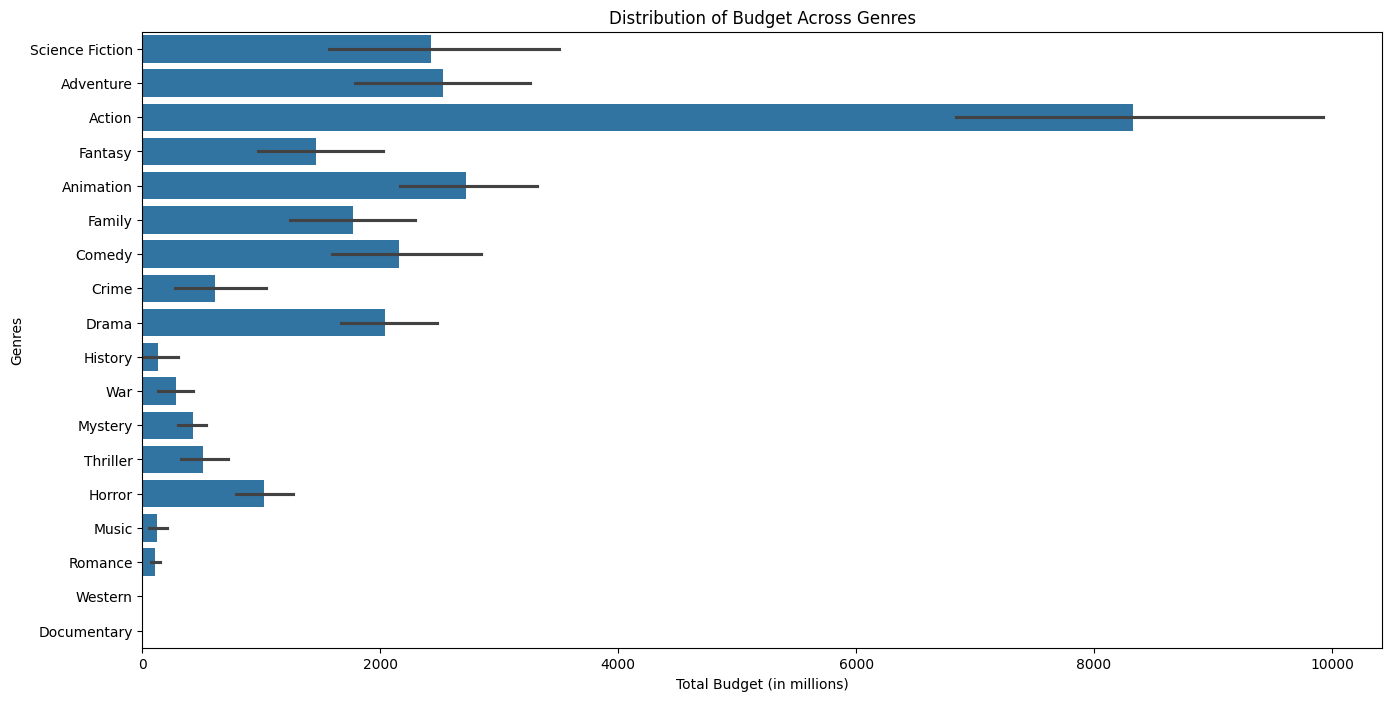

In [32]:
plt.figure(figsize=(16, 8))
sns.barplot(y='genres', x='budget_M', data=df, estimator=sum)
plt.title('Distribution of Budget Across Genres')
plt.ylabel('Genres')
plt.xlabel('Total Budget (in millions)')
plt.show()

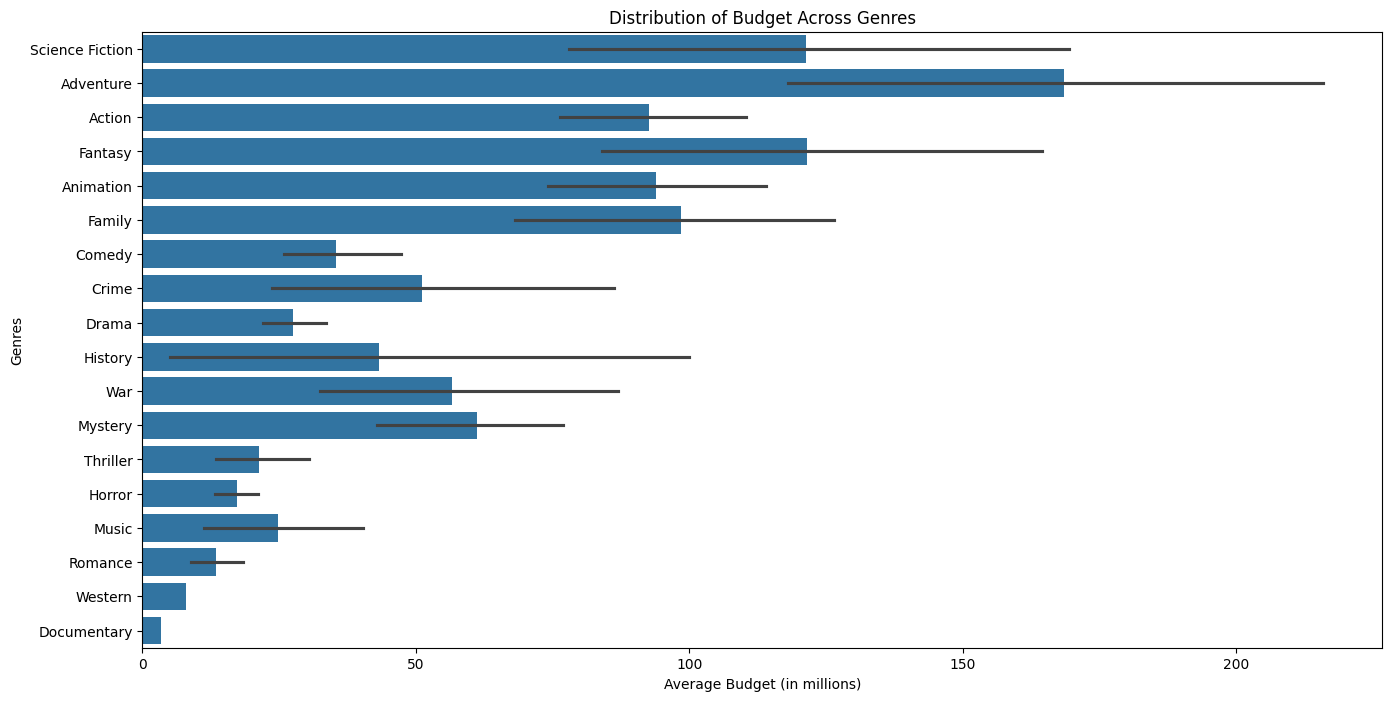

In [34]:
plt.figure(figsize=(16, 8))
sns.barplot(y='genres', x='budget_M', data=df, estimator='mean')
plt.title('Distribution of Budget Across Genres')
plt.ylabel('Genres')
plt.xlabel('Average Budget (in millions)')
plt.show()

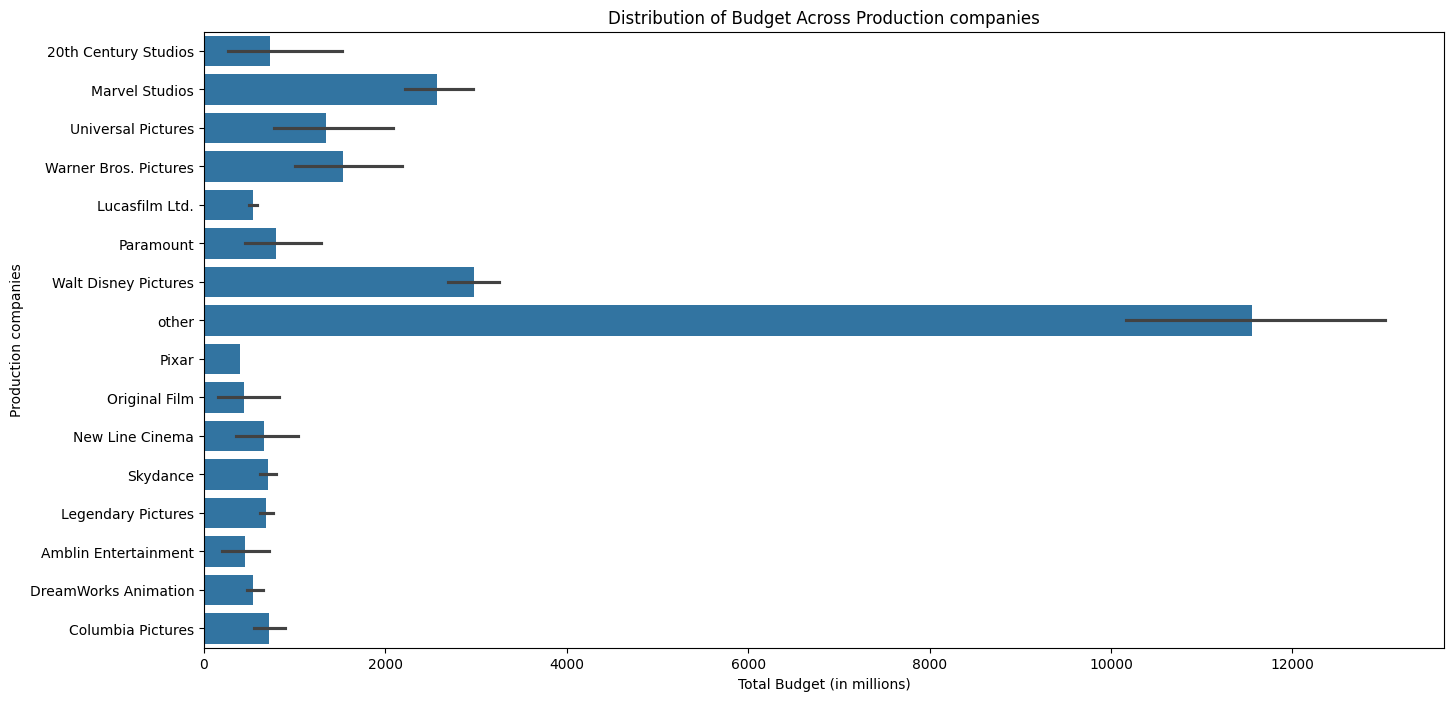

In [27]:
plt.figure(figsize=(16, 8))
sns.barplot(y='production_companies', x='budget_M', data=df, estimator=sum)
plt.title('Distribution of Budget Across Production companies')
plt.ylabel('Production companies')
plt.xlabel('Total Budget (in millions)')
plt.show()

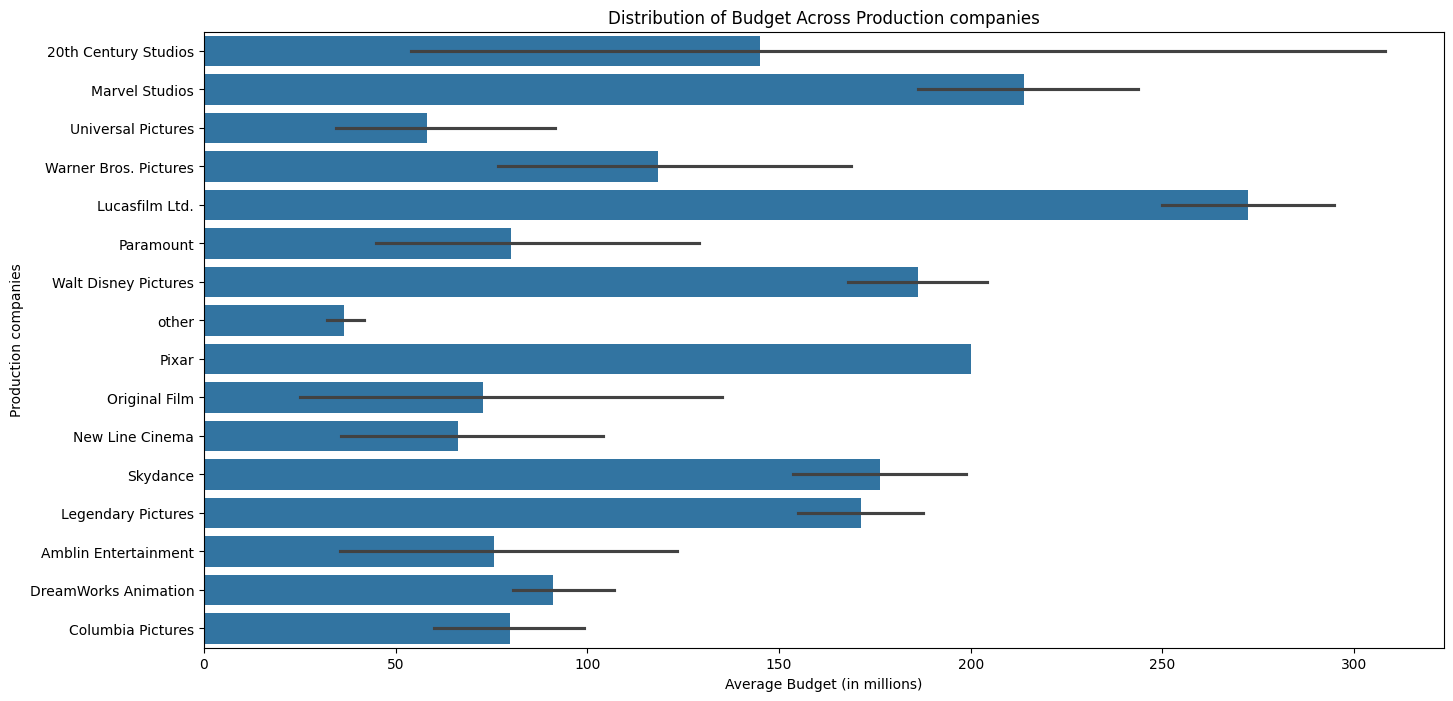

In [35]:
plt.figure(figsize=(16, 8))
sns.barplot(y='production_companies', x='budget_M', data=df, estimator='mean')
plt.title('Distribution of Budget Across Production companies')
plt.ylabel('Production companies')
plt.xlabel('Average Budget (in millions)')
plt.show()